In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Loading a color image Gray scale
img = cv2.imread('Input/Image/WindowsFlags.jpg',0) # First parameter is image path and second is flag 0

### Display an image

In [4]:
cv2.imshow('W7Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

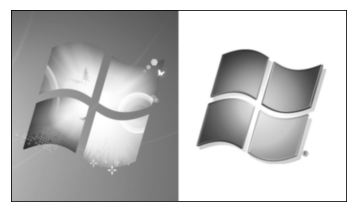

In [7]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([])
plt.yticks([]);


### Loading color image and plotting it in matplotlib 

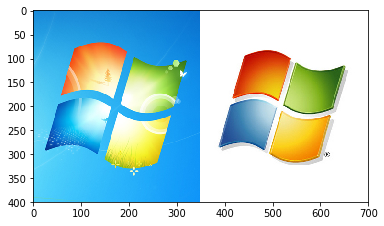

In [8]:
img = cv2.imread('Input/Image/WindowsFlags.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
#Writing an image to file
cv2.imwrite('Output/Image/w7gray.png',img)

True

In [5]:
#All together
import cv2
import numpy as np
from PIL import Image

img = cv2.imread('Input/Image/WindowsFlags.jpg',0)
cv2.imshow('W7Image',img)
k=cv2.waitKey(0)
if k == 27:# press 'esc' to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # press 's' to save and exit
    cv2.imwrite('Output/Image/w7gray.png',img)
    cv2.destroyAllWindows()



## Working with color spaces RGB & HSV

Remember OpenCV's RGB is actually stored as BGR 


In [5]:
image = cv2.imread('Input/Image/WindowsFlags.jpg')

#BGR value for the first 0,0 pixel
B,G,R = image[0,0]
print(B,G,R)
print(image.shape)

215 137 24
(400, 700, 3)


In [12]:
# Loading it as gray scale image and checking the values:

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(gray_image[0,0])
print(gray_image.shape)
print(gray_image[10,20])

112
(400, 700)
116


##### It's now only 2 dimensions. Each pixel coordinate has only one value (previously 3) with a range of 0 to 255

## HSV Color Space

(Hue, Saturation & Value/Brightness) is a color space that attempts to 
represent colors the way humans perceive it. It stores color information in 
a cylindrical representation of RGB color points.

HUE = 0-179,
Saturation = 0-255,
Value = 0-255

Its useful in color filtering, HSV makes easier to set color ranges to filter specific colors as we perceive them

Shape of hsv image (400, 700, 3)


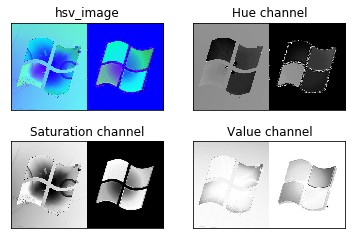

In [22]:
image = cv2.imread('Input/Image/WindowsFlags.jpg')

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#print('Shape of hsv image',hsv_image.shape)
# plt.imshow(hsv_image)
Hue_channel = hsv_image[:, :, 0]
Saturation_channel = hsv_image[:, :, 1]
Value_channel= hsv_image[:, :, 2]
titles = ['hsv_image', 'Hue channel',
            'Saturation channel', 'Value channel']
images = [hsv_image, Hue_channel, Saturation_channel, Value_channel]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


### Exploring individual channels in RGB Image

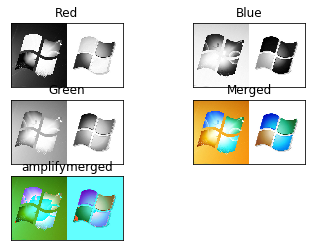

In [11]:
image = cv2.imread('Input/Image/WindowsFlags.jpg')

# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)

# print(B.shape)
# cv2.imshow("Red", R)
# cv2.imshow("Green", G)
# cv2.imshow("Blue", B)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# # Let's re-make the original image, 
merged = cv2.merge([B, G, R])
# # cv2.imshow("Merged", merged) 

# # Let's amplify the blue color
amplifymerged = cv2.merge([B+100, G, R])
# # cv2.imshow("Merged with Blue Amplified", merged) 

titles = ['Red',"Blue",'Green','Merged',"amplifymerged"]
Imgs = [R,B,G,merged,amplifymerged]
for i in range(5):
    plt.subplot(3,2,i+1),plt.imshow(Imgs[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()




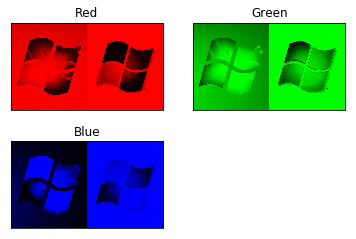

In [29]:
import cv2
import numpy as np

B, G, R = cv2.split(image)

# Let's create a matrix of zeros 
# with dimensions of the image h x w  
zeros = np.zeros(image.shape[:2], dtype = "uint8")
# print(image.shape)
# print(image.shape[:2])

# print(zeros.shape)
# print(R[0,0])

Red = cv2.merge([zeros, zeros, R])
Green = cv2.merge([zeros, G, zeros])
Blue = cv2.merge([B, zeros, zeros])

titles1 = ['Red',"Green",'Blue']
Images1 = [Blue,Green,Red]
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(Images1[i])
    plt.title(titles1[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
# cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
# cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))

# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Working with Videos

In [6]:
# capturing a video from built in camera and save the frames
cap = cv2.VideoCapture(0)

#define the codec and create videowriter obj
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('Output/Video/output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret,frame = cap.read()
    if ret == True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
#releae the capture
cap.release()
out.release()
cv2.destroyAllWindows()

### Playing video from file and convert it into frames

In [7]:
import cv2
import time,os
def video_file(video):
    start = time.time()
    cap = cv2.VideoCapture(video)
    fps = cap.get(cv2.CAP_PROP_FPS) # calculating frames per second
    totalFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # total frames
    print(totalFrames)
    videolength = totalFrames/fps
    
    count = 0
    flag  = True
    noOfFrames = 4
    interval = round(totalFrames/noOfFrames)
    while(flag):
        i=0
        while (i<interval-1):
            a,b  = cap.read()
            i += 1
        flag,frame = cap.read()
        #flip the frames
        frame=cv2.transpose(frame)
        frame=cv2.flip(frame,flipCode=1)

        name = 'Output/Video/frames/frame_'+str(count)+'.jpg'
        cv2.imwrite(name,frame)
        count += 1
    print('Time taken'+ str(time.time()-start))
    name = 'Output/Video/frames/frame_' +str(count - 1)+'.jpg'
    os.remove(name)
    cap.release()
    
     

In [8]:
video_file('Input//Video/Lcc_car7.mp4')

60
Time taken0.6779580116271973
